# Final SVM Tutorial

## Initial Model

### Import libraries

`seaborn` will be used to load the penguins dataset and visualize the data

`matplotlib.pyplot` will be used to show and modify visualizations

`pandas` will be used to manipulate data via DataFrame

`SVC` class is used to make the model

`train_test_split()` will be used to split the data into training and testing sets

`accuracy_score()` will be used to evaluate the performance of the model

In [1]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load and explore dataset

`species` represents the target data

In [4]:
df = load_dataset('penguins')
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0  Adelie  Torgersen            39.1           18.7              181.0  \
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [3]:
df = df.dropna()

len(df)

333

## Experiment with K-Means

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

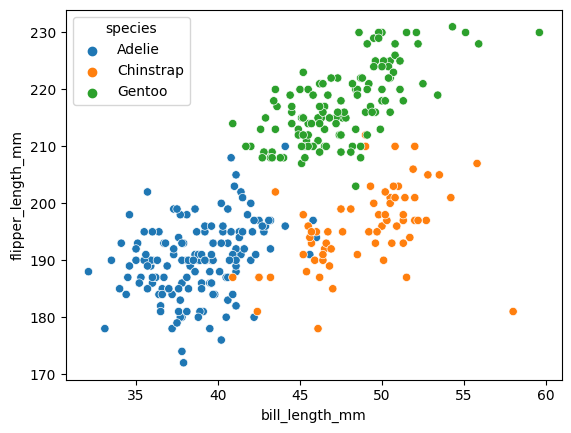

In [9]:
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', hue='species')

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

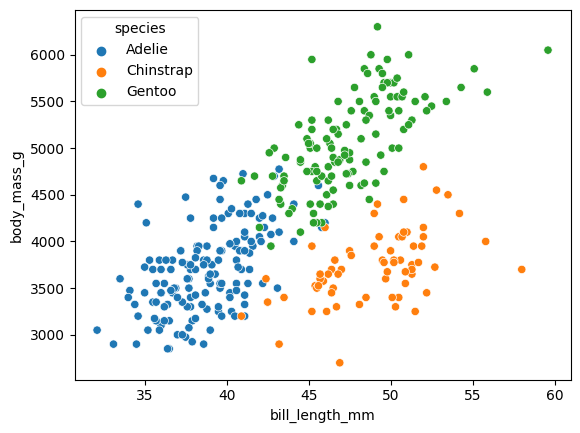

In [10]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')

In [49]:
features = ['bill_length_mm', 'flipper_length_mm']
X = df[features]
y = df['species']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)

X_train = pd.DataFrame(data=X_train, columns=['bill_length_mm', 'flipper_length_mm'])

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1, n_init=30)
kmeans.fit(X_train)

KMeans(n_clusters=3, n_init=30, random_state=1)

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

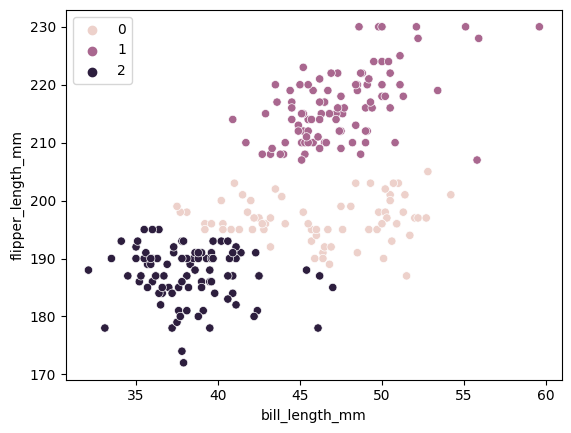

In [55]:
sns.scatterplot(data=X_train, x='bill_length_mm', y='flipper_length_mm', hue=kmeans.labels_)